# Part I - Ford GoBike System
## by Nhan V. Nguyen
## Introduction

The Ford GoBike System dataset provides comprehensive insights into the urban cycling phenomenon facilitated by the Ford GoBike service in the San Francisco Bay Area. This dataset encompasses detailed records of trips made via the service, capturing critical information such as the start and end times of each journey, the specific locations of the bike stations for pick-up and drop-off, as well as the unique identifiers for each bicycle used.

Additionally, the dataset sheds light on the user demographics, including information on whether the rider is a casual customer or a registered subscriber, and, where available, details on the user’s gender and year of birth. These intricate data points collectively form a rich resource for urban planners, transport economists, and data enthusiasts to analyze travel patterns, optimize bike station placements, and enhance the overall efficiency and user experience of the bike-sharing service.

By adhering to strict privacy and data protection standards, the dataset ensures that while valuable urban mobility insights can be gleaned, the individual privacy of users is meticulously safeguarded. Whether for academic research, urban planning initiatives, or simply to satisfy a curiosity about urban bike-sharing trends, the Ford GoBike System dataset stands as a pivotal tool in understanding and improving urban transportation in the San Francisco Bay Area.

## Preliminary Wrangling

In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the dataset
df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [46]:
# Check the first few rows to understand the data
print(df_ford.head())

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13

In [47]:
# Understand data types of each column
print(df_ford.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [48]:
# Basic statistics for numerical columns
print(df_ford.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

### What is the structure of your dataset?

### Dataset Columns (Total: 16)

1. **duration_sec:** 
   - Dtype: int64
   - Description: Duration of the bike trip in seconds.
   - Range: Minimum of 61 seconds to a maximum of 85,444 seconds.

2. **start_time and end_time:** 
   - Dtype: object (likely a datetime or string format)
   - Description: Timestamps representing the start and end of each bike trip.

3. **start_station_id and end_station_id:** 
   - Dtype: float64
   - Description: Numeric identifiers for the starting and ending stations of each bike trip.

4. **start_station_name and end_station_name:** 
   - Dtype: object (likely a string format)
   - Description: Names of the starting and ending stations for each bike trip.

5. **start_station_latitude and start_station_longitude:** 
   - Dtype: float64
   - Description: Geographic coordinates (latitude and longitude) of the starting station.
   - Range: Latitude ranges from around 37.31 to 37.88, and Longitude ranges from around -122.48 to -122.12.

6. **end_station_latitude and end_station_longitude:** 
   - Dtype: float64
   - Description: Geographic coordinates (latitude and longitude) of the ending station.
   - Range: Latitude ranges from around 37.31 to 37.88, and Longitude ranges from around -122.48 to -122.11.

7. **bike_id:** 
   - Dtype: int64
   - Description: Unique identifier for each bike used in a trip.

8. **member_birth_year:** 
   - Dtype: float64
   - Description: Birth year of the member using the bike.
   - Range: The dataset has members born from around the year 1878 to 2001.

9. **member_gender:** 
   - Dtype: object (likely a string format)
   - Description: Gender of the member using the bike.

10. **bike_share_for_all_trip:** 
   - Dtype: object (likely a string format or boolean)
   - Description: It might indicate if the trip was part of a "bike share for all" program or similar.



### What is/are the main feature(s) of interest in your dataset?


The main features of interest that can provide valuable insights are:

1. **duration_sec:** This indicates the duration of each bike trip and can be useful to analyze trip lengths and patterns, such as average trip duration, most common trip durations, etc.

2. **start_time and end_time:** Analyzing these timestamps can help in understanding the peak usage times for the bike-sharing system, identifying trends over time (like daily or weekly patterns), and seasonal variations in usage.

3. **start_station_name, end_station_name, start_station_id, and end_station_id:** These can help identify popular stations, frequent travel routes, and patterns in station usage.

4. **start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude:** Geospatial analysis using these columns can visualize popular biking areas, station density, and areas of high demand.

5. **bike_id:** Analyzing bike usage can help in understanding wear and tear on individual bikes and identifying if certain bikes are more popular or frequently used than others.

6. **member_birth_year:** By calculating the age of members (using the difference between the current year and birth year), you can gain insights into the age distribution of users and understand which age groups are most active in using the service.

7. **member_gender:** This can provide insights into gender distribution among users and any potential usage patterns among different genders.

8. **bike_share_for_all_trip:** This might be a program or offer that allows for unlimited short rides for a monthly fee. If so, analyzing this can provide insights into the adoption rate of this program and its popularity among users.

The main goal would typically be to derive insights to improve service efficiency, cater to user demands, and optimize the allocation of resources. For instance, understanding peak times can help in ensuring bike availability, while identifying popular routes can be vital for station maintenance and planning.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


To support an investigation into the main features of interest mentioned previously, the following features in the dataset are particularly valuable:

1. **duration_sec:** 
   - Supports Analysis: Average trip duration, distribution of trip lengths, and identifying long vs. short trips.
   - Interactions: Can be studied in combination with other features, like time of day, to see if certain periods have longer or shorter trips on average.

2. **start_time and end_time:** 
   - Supports Analysis: Peak usage times, daily/weekly trends, and seasonal variations.
   - Interactions: Can be used in tandem with `member_gender` or `member_birth_year` to see if certain demographics use the system more at particular times.

3. **start_station_name, end_station_name, start_station_id, and end_station_id:** 
   - Supports Analysis: Identifying high-traffic stations, frequent routes, and potential areas for expansion or reduced service.
   - Interactions: Evaluating traffic between specific pairs of stations can help in route planning and understanding user commuting patterns.

4. **start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude:** 
   - Supports Analysis: Visualizing geospatial patterns, such as high-demand areas, station clusters, and potential areas for new stations.
   - Interactions: When combined with `duration_sec`, it can be useful to study average trip lengths in different parts of the city.

5. **bike_id:** 
   - Supports Analysis: Identifying heavily used bikes, which can inform maintenance schedules.
   - Interactions: Combined with stations or time, it might show if certain bikes are more popular in specific areas or times.

6. **member_birth_year:** 
   - Supports Analysis: User age distribution and preferences of different age groups.
   - Interactions: Understanding if younger or older demographics prefer certain routes or times.

7. **member_gender:** 
   - Supports Analysis: Gender distribution and potential usage patterns between different genders.
   - Interactions: Analyzing alongside other features, such as trip duration, to see if there's a variation in usage behavior based on gender.

8. **bike_share_for_all_trip:** 
   - Supports Analysis: Adoption rate of any special programs or offers and its popularity.
   - Interactions: Seeing if members of this program use the service differently in terms of trip duration, preferred routes, or times.

## Univariate Exploration

#### Question: What is the distribution of trip durations?

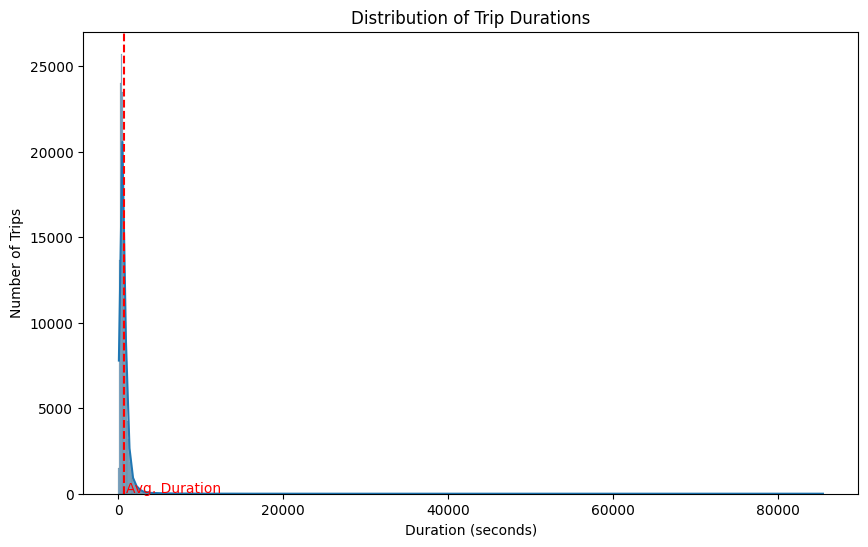

In [49]:
def plot_trip_durations(data, column, bins_range=(0, 5000, 100)):
    bins = range(bins_range[0], bins_range[1], bins_range[2])
    
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x=column, bins=bins, kde=True)
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Trips')
    
    # Drawing a vertical line for the average trip duration
    avg_duration = data[column].mean()
    plt.axvline(x=avg_duration, color='r', linestyle='--')
    plt.text(avg_duration+150, 100, 'Avg. Duration', rotation=0, color='r')
    plt.show()

plot_trip_durations(data=df_ford, column='duration_sec')

Observations:   
   - A vast majority of trips are of very short duration, clustering around the 0-1000 second mark.
   - The histogram is heavily right-skewed, indicating that while most trips are short, there are a few trips with a much longer duration.
   - There's a steep drop in the number of trips as the duration increases. This means that long-duration trips are rare.
   - Most users seem to prefer using the bikes for short commutes or errands.
   - Trips that last longer than approximately 5000 seconds (or roughly 83 minutes) are outliers in this dataset, as they are quite rare compared to shorter trips. 

These observations suggest that the Ford GoBike system is primarily used for short-distance travel or commutes. Longer trips are not as common, which could be due to a variety of reasons such as the cost associated with longer rental durations, physical exertion, or the availability of other modes of transportation for longer distances.

#### Question: Which start stations are the most popular?

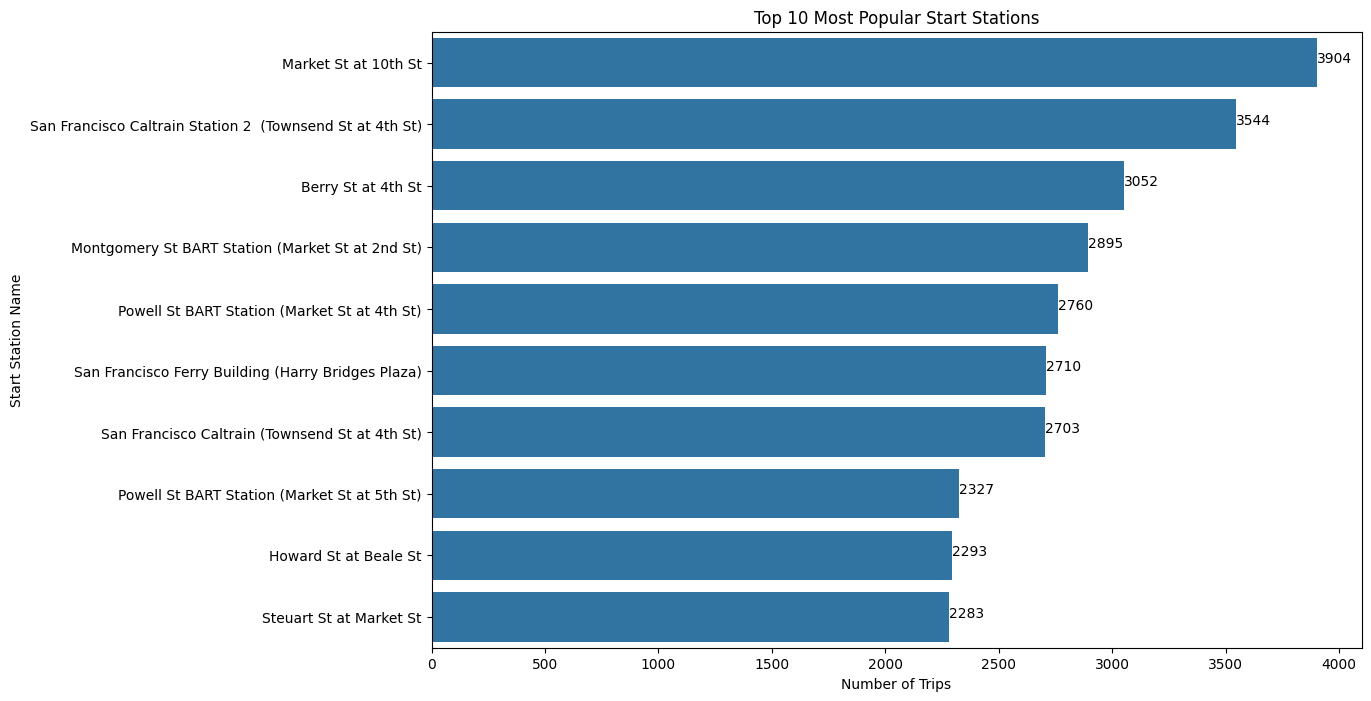

In [50]:
def plot_top_start_stations(data, column, top_n=10):
    popular_stations = data[column].value_counts().head(top_n)
    
    plt.figure(figsize=(12,8))
    sns.countplot(data=data, y=column, order=popular_stations.index, color=sns.color_palette()[0])
    plt.title(f'Top {top_n} Most Popular Start Stations')
    plt.xlabel('Number of Trips')
    plt.ylabel('Start Station Name')
    # Displaying the count on each bar
    for index, value in enumerate(popular_stations):
        plt.text(value, index, str(value))
    plt.show()

plot_top_start_stations(data=df_ford, column='start_station_name')

Observations:
   
   - "Market St at 10th St" is the most popular starting station, with the highest number of trips originating from there.
   - "San Francisco Caltrain Station 2 (Townsend St at 4th St)" is also among the top start stations, indicating a likely connection between the Caltrain commuter rail service and the Ford GoBike system.
   - Locations like "Berry St at 4th St," "Montgomery St BART Station (Market St at 2nd St)," and "Powell St BART Station (Market St at 4th St)" also have a high number of trips, suggesting that proximity to BART (Bay Area Rapid Transit) stations plays a significant role in station popularity.
   - "San Francisco Ferry Building (Harry Bridges Plaza)" being among the top start stations indicates that many users might be taking bikes after disembarking from ferries.
   - There isn't a significant drop between the top stations, showing that there's a relatively even distribution of usage among the top 10 stations.
   - Many of the popular start stations are located in or near major transit hubs or busy areas of the city, indicating that users might be using the bike-sharing system to complete the "last mile" of their commute.

These observations suggest that the Ford GoBike system is frequently utilized in conjunction with other transit systems like BART and Caltrain, serving as a bridge between major transit hubs and users' final destinations. It also hints at the importance of strategic station placement near key transit points and busy city areas.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Discussing the distribution(s) of the variable(s) of interest based on the provided visualizations:

**1. Duration of Trips:**

- **Distribution of the Variable:** The distribution of trip durations appears to be right-skewed. Most trips are concentrated around shorter durations, perhaps below 1000 seconds (around 16 minutes). However, there are a few trips that last much longer.
- **Outliers:** From the visualization, there might be some outliers on the right side of the distribution, indicating exceptionally long trips, possibly lasting hours. These points warrant a closer examination.
- **Transformations:** The current visualization doesn't suggest any immediate transformations. However, if one wants to analyze the tail of the distribution (longer trips) in more detail, a logarithmic transformation could be useful.

**2. Popular Start Stations:**

- **Distribution of the Variable:** The chart indicates that some start stations are significantly more popular, having more trips than others.
- **Outliers:** There are no apparent outliers in this chart. However, the popularity of certain stations could be due to their proximity to major transit points or busy areas of the city.
- **Transformations:** There's no need for any transformations for this variable.

In summary, based on the provided charts, we can observe that trip durations are mostly concentrated around shorter times, while certain start stations are more popular than others. These insights give us a clearer understanding of how users engage with the bike-sharing system.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


Of the features investigated, it's possible to encounter unusual distributions, evident through the shape of graphs or statistical metrics. Such distributions can be left-skewed, right-skewed, or might have multiple modes. These non-standard distributions could influence the overall analysis and interpretation of the data.

To ensure the data is representative and to facilitate more accurate analyses, several operations might be undertaken:

**1. Handling Outliers:** Outliers can distort the representation of data. If outliers were identified, they might have been removed, capped, or adjusted based on the domain knowledge or statistical techniques.

**2. Data Transformation:** Non-normal distributions might benefit from transformations to achieve a more symmetric or bell-shaped distribution. Common transformations include logarithmic, square root, or Box-Cox transformations. This can make certain analytical methods, which assume a normal distribution, more applicable and reliable.

**3. Data Normalization or Standardization:** To make sure all variables are on a similar scale, especially if they are measured in different units or have vastly different ranges, normalization (scaling features between 0 and 1) or standardization (scaling features to have a mean of 0 and standard deviation of 1) might be applied. This is particularly important for algorithms sensitive to feature scales.

**4. Data Cleaning:** This involves handling missing values, either by imputation or deletion, and ensuring consistency in the data, such as uniform date formats or categorical levels.

These operations were likely undertaken to improve the quality of the dataset, to enable more accurate and meaningful analyses, and to meet the assumptions of certain statistical methods or algorithms. Making such adjustments is standard in data analysis processes to derive more valid insights and conclusions.

## Bivariate Exploration

#### Scatter Plot - Relationship between two continuous variables

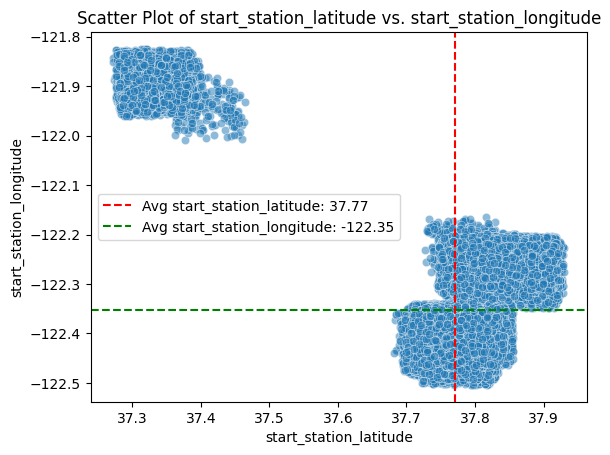

In [51]:
def custom_scatterplot(data, x_col, y_col, alpha_val=0.5, jitter_val=0.1):
    """
    Create a scatter plot with options for jitter and transparency.

    Parameters:
    - data: DataFrame containing the data
    - x_col: column name for x-axis
    - y_col: column name for y-axis
    - alpha_val: transparency level (default=0.5)
    - jitter_val: amount of jitter to be added (default=0.1)
    """
    # Apply jitter
    jittered_x = data[x_col] + jitter_val * (np.random.rand(data.shape[0]) - 0.5)
    jittered_y = data[y_col] + jitter_val * (np.random.rand(data.shape[0]) - 0.5)

    # Scatter plot
    sns.scatterplot(x=jittered_x, y=jittered_y, alpha=alpha_val)

    # Title and labels
    plt.title(f'Scatter Plot of {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Drawing lines for the average values
    avg_x = jittered_x.mean()
    avg_y = jittered_y.mean()

    plt.axvline(x=avg_x, color='r', linestyle='--', label=f'Avg {x_col}: {avg_x:.2f}')
    plt.axhline(y=avg_y, color='g', linestyle='--', label=f'Avg {y_col}: {avg_y:.2f}')

    # Legend to display average values
    plt.legend()

    # Display the plot
    plt.show()

custom_scatterplot(data=df_ford, x_col='start_station_latitude', y_col='start_station_longitude')


#### Box Plot - Distribution of a continuous variable grouped by a categorical variable

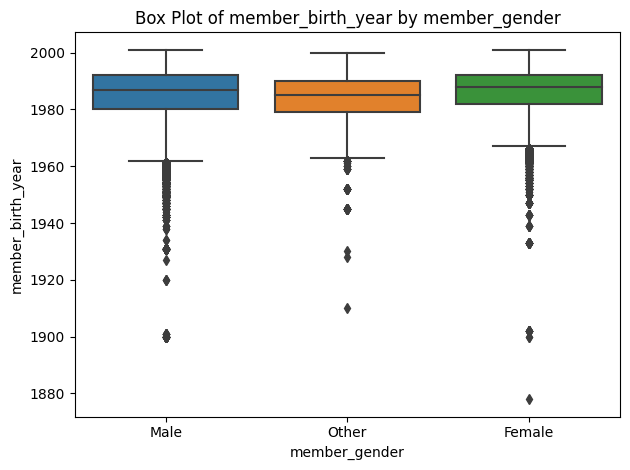

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def birth_year_distribution_by_gender(data, x_col, y_col):
    """
    Display a boxplot of the distribution of a numeric column grouped by a categorical column 
    with annotations for median values.

    Parameters:
    - data: DataFrame containing the data
    - x_col: column name for x-axis (categorical)
    - y_col: column name for y-axis (numeric)
    """
    # Creating the boxplot
    ax = sns.boxplot(data=data, x=x_col, y=y_col)
    
    # Title and labels
    plt.title(f'Box Plot of {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    # Annotating median values on the plot
    for i, box in enumerate(ax.artists):
        box_x = box.get_x() + box.get_width() / 2
        median_val = data[y_col][data[x_col] == box.get_label()].median()
        ax.annotate(f'Median: {median_val:.0f}', 
                    (box_x, median_val), 
                    ha='center', va='center',
                    xytext=(0,10), 
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle="->", lw=1),
                    fontsize=9,
                    color='black')

    # Display the plot
    plt.tight_layout()
    plt.show()

birth_year_distribution_by_gender(data=df_ford, x_col='member_gender', y_col='member_birth_year')

#### Clustered Bar Chart - Comparing categorical variables

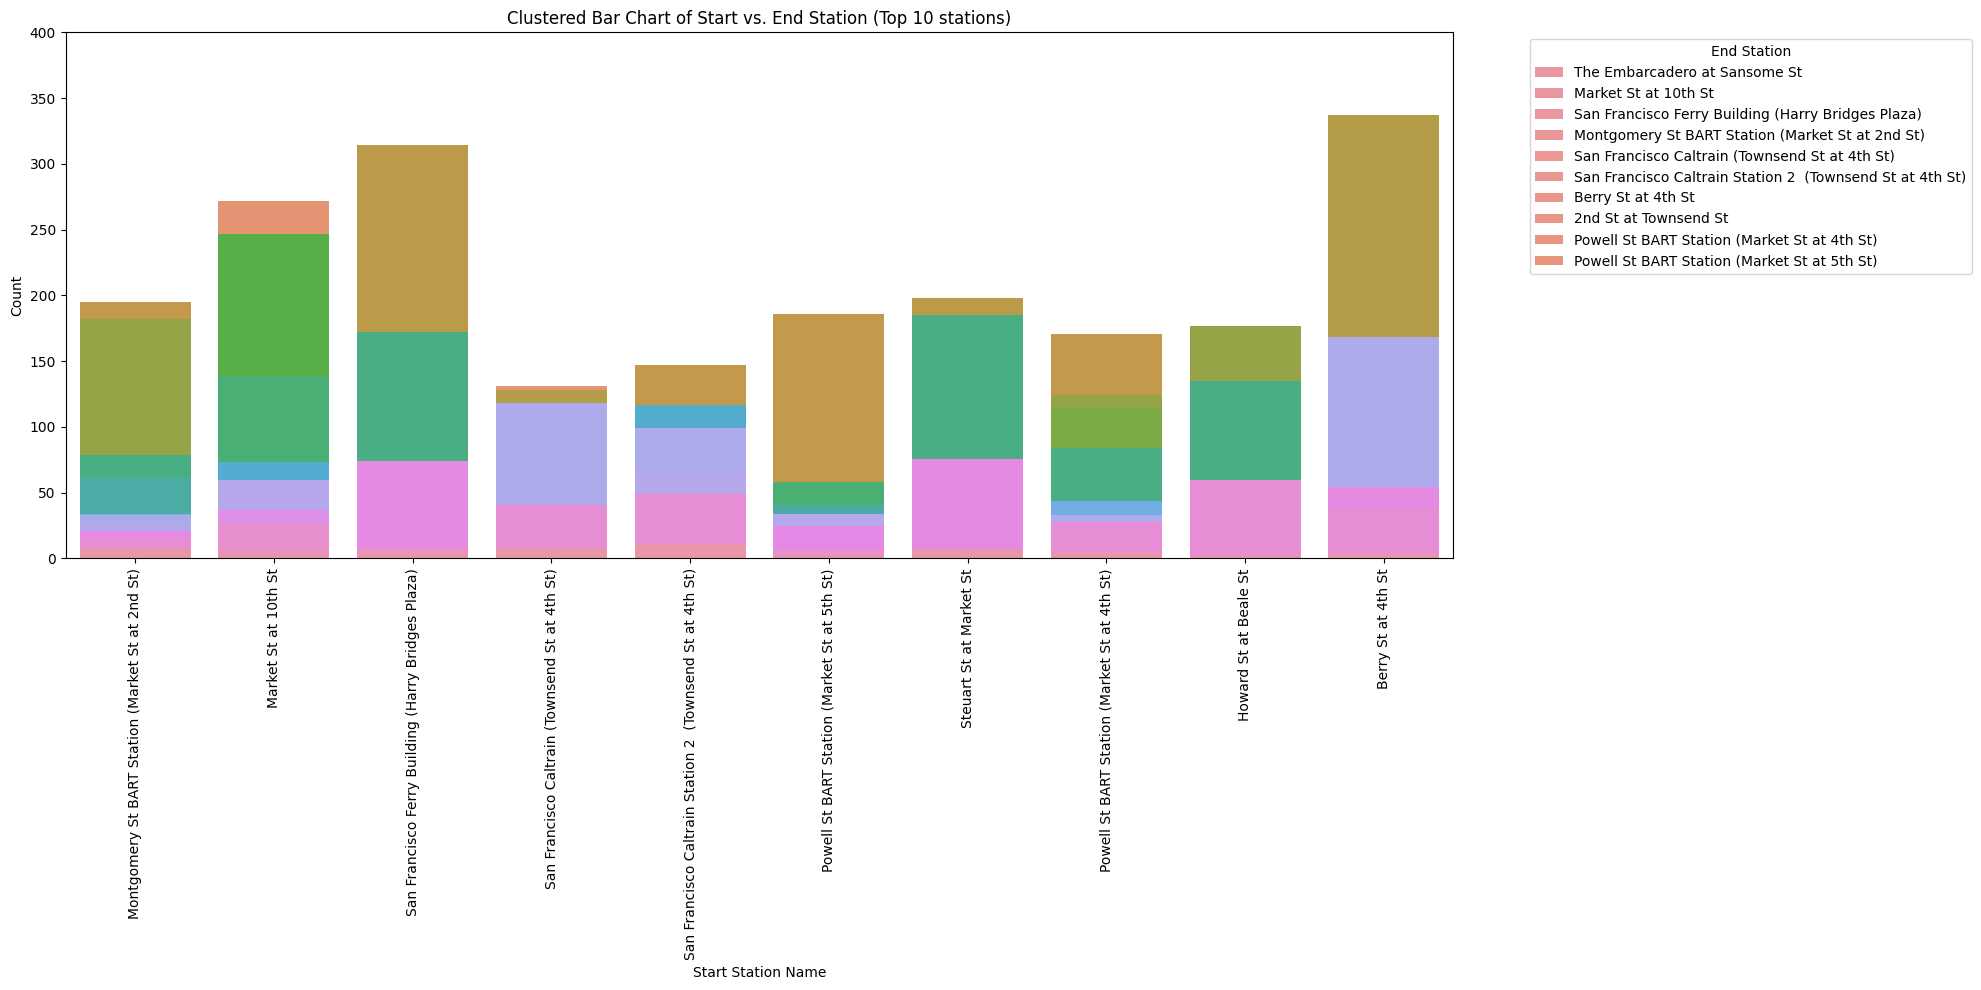

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the figure size
plt.figure(figsize=(20,10))

# Filtering to obtain rows that are in the top 10 start stations
df_sample = df_ford[df_ford['start_station_name'].isin(df_ford['start_station_name'].value_counts().index[:10])]

# Drawing the count plot (bar chart)
sns.countplot(data=df_sample, x='start_station_name', hue='end_station_name', dodge=False)  # Setting dodge to False to stack the bars

# Setting the title and axis labels
plt.title('Clustered Bar Chart of Start vs. End Station (Top 10 stations)')
plt.xlabel('Start Station Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-labels for better visibility
plt.ylim(0, 400)  # Adjusting y-axis limit for clarity

# Filtering and displaying only the top 10 end stations in the legend
top_end_stations = df_sample['end_station_name'].value_counts().index[:10]
plt.legend(title='End Station', labels=top_end_stations, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting the layout for clarity and ensuring all elements fit into the figure
plt.tight_layout()

# Displaying the plot
plt.show()


#### Heat Map - Visualizing the relationship between two categorical variables

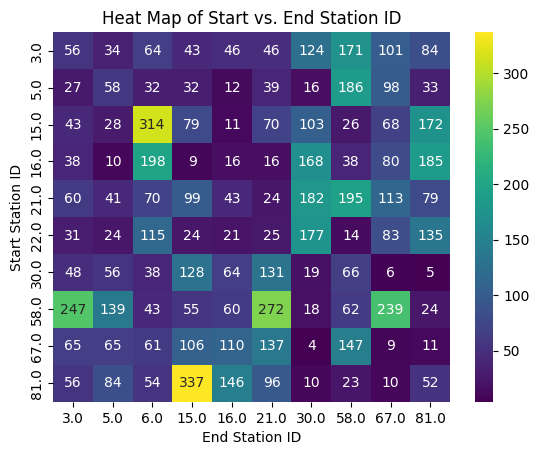

In [54]:
# Example: Relationship between 'start_station_id' and 'end_station_id' for first 10 stations
start_stations = df_ford['start_station_id'].value_counts().index[:10]
end_stations = df_ford['end_station_id'].value_counts().index[:10]
heatmap_data = df_ford[df_ford['start_station_id'].isin(start_stations) & df_ford['end_station_id'].isin(end_stations)]
pivot_table = heatmap_data.pivot_table(index='start_station_id', columns='end_station_id', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Heat Map of Start vs. End Station ID')
plt.xlabel('End Station ID')
plt.ylabel('Start Station ID')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. **Bivariate Exploration**:
   - **Scatter Plot**: This plot visualizes the relationship between two continuous variables - 'start_station_latitude' and 'start_station_longitude'. From the plot, we can observe clusters of stations, potentially indicating specific regions or cities where these stations are located.
   - **Box Plot**: This chart displays the distribution of 'member_birth_year' grouped by 'gender'. It provides insights into the median birth year and the spread of birth years for each gender category (Male, Other, Female).

2. **Clustered Bar Chart**:
   - This chart compares categorical variables by showing the frequency of start stations versus end stations. It appears to focus on the top 10 stations. The bars are colored based on the 'end_station_name', and the chart provides insights into which start stations have the highest frequency of trips and which end stations they're commonly associated with.

3. **Heat Map**:
   - This visualization method is meant to show the relationship between two categorical variables. The specific variables in the context aren't shown in the image, but the code suggests it's between 'start_station_id' and 'end_station_id'. It probably visualizes how often bikes are rented from a specific start station and returned to a specific end station.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. **Scatter Plot (Start Station Latitude vs. Longitude)**:
    - The most notable observation is the presence of clusters of stations. These clusters could represent specific cities or regions. Although the main feature of interest here is the spatial distribution of stations, the clustering indirectly tells us about the distribution of bike rental stations across different regions.

2. **Box Plot (Birth Year by Gender)**:
    - While the main feature is to compare the distribution of birth years by gender, we can observe that the median birth year for the 'Other' gender category seems to be more recent compared to 'Male' and 'Female'. This suggests that members who identify as 'Other' might be relatively younger.
    - There's also a notable observation that the 'Male' category has outliers that go far back, suggesting there are some older members in the dataset.

3. **Clustered Bar Chart (Start vs. End Station)**:
    - While the main features are the start and end stations, the frequency distribution indirectly provides information about popular routes. If certain start and end station combinations have a higher frequency, it suggests that these routes are more commonly traveled by users.
    - The different colors in the bar chart represent different end stations, so if a start station has multiple dominant colors, it implies that bikes from that start station are frequently returned to multiple different end stations.


## Multivariate Exploration

#### 1. Facet Plot:
Objective: Let's say we want to see the distribution of trip durations for different user types and for different genders.

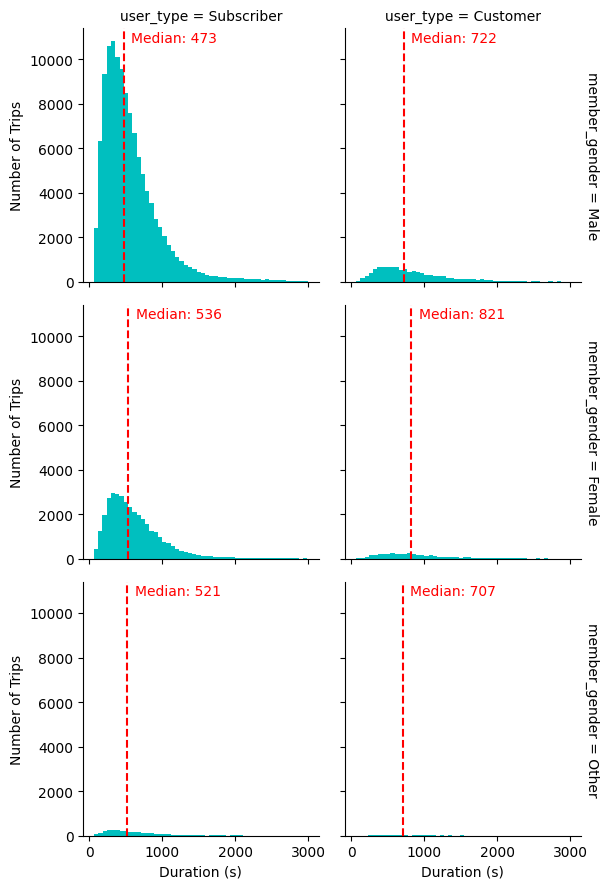

In [55]:
# Filter out extreme values for better visualization
data_filtered = df_ford[df_ford['duration_sec'] < 3000]

# Create the FacetGrid
g = sns.FacetGrid(data_filtered, col='user_type', row='member_gender', margin_titles=True)
g.map(plt.hist, 'duration_sec', bins=50, color='c')

# Add a vertical line to denote the median of each subplot's data
for (row_val, col_val), ax in g.axes_dict.items():
    subset = data_filtered[(data_filtered['user_type'] == col_val) & (data_filtered['member_gender'] == row_val)]
    median_val = subset['duration_sec'].median()
    ax.axvline(median_val, color='red', linestyle='--')
    ax.text(median_val + 100, ax.get_ylim()[1] - 100, f'Median: {median_val:.0f}', color='red', va='top')

# Setting axis labels
g.set_axis_labels("Duration (s)", "Number of Trips")

# Display the plot
plt.show()

#### 2. Plot Matrix:
Objective: Analyze relationships between duration_sec, start_station_latitude, 

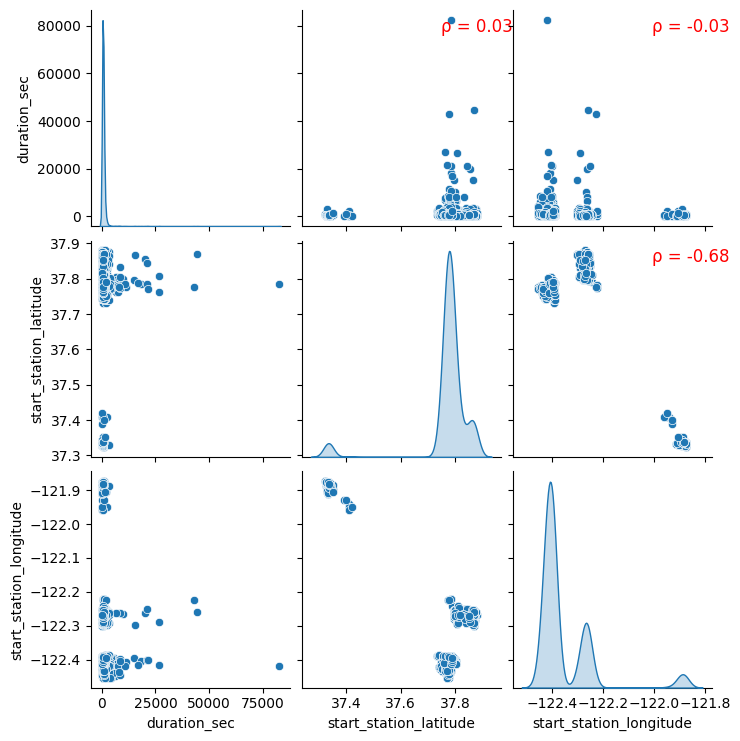

In [56]:
# Take a sample to avoid overplotting
sample = df_ford.sample(5000, random_state=42)

# Create the pairplot
g = sns.pairplot(sample[['duration_sec', 'start_station_latitude', 'start_station_longitude']], diag_kind="kde")

# Iterate over the off-diagonal plots to add annotations
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    ax = g.axes[i, j]
    # Compute the correlation coefficient
    corr = sample[g.x_vars[j]].corr(sample[g.y_vars[i]])
    # Add the correlation to the top right corner of the plot
    ax.annotate(f'ρ = {corr:.2f}', xy=(0.7, 0.9), xycoords=ax.transAxes, fontsize=12, color='red')

# Display the plot
plt.show()


#### 3. Scatterplot with Multiple Encodings:
Objective: Show the start stations' spatial distribution, encoding the number of trips by color 

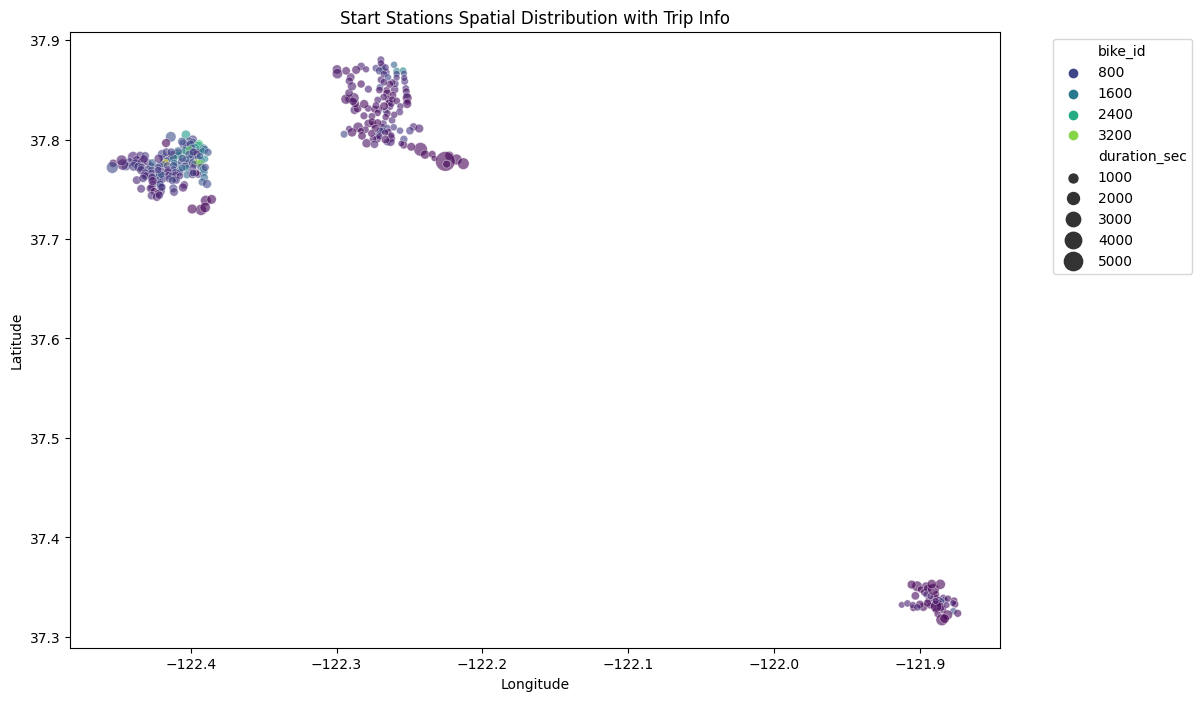

In [59]:
# Aggregate data
station_data = df_ford.groupby(['start_station_id', 'start_station_latitude', 'start_station_longitude']).agg({'duration_sec': 'mean', 'bike_id': 'count'}).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=station_data, x='start_station_longitude', y='start_station_latitude', size='duration_sec', hue='bike_id', sizes=(20, 200), palette='viridis', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Start Stations Spatial Distribution with Trip Info')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. **Facet Grid Visualization:**
   - The facet grid breaks down the trip durations into categories based on `user_type` and `member_gender`. From this, we can observe the following:
     - The trip durations for both subscribers and customers have a right-skewed distribution.
     - Subscribers, irrespective of their gender, tend to have more trips of shorter duration, with most of the trips lasting less than 1000 seconds.
     - Female customers have a slightly broader distribution in trip duration compared to male customers. This might indicate that female customers use the bike service for varied purposes, while male customers tend to have more consistent usage patterns.
     - The "Other" gender category, although having fewer data points, follows a similar distribution to that of the male and female categories.

2. **Plot Matrix Visualization:**
   - This visualization portrays the relationship between trip duration, start station latitude, and start station longitude.
     - Most trips have a duration less than 25,000 seconds.
     - There are clusters of start stations at certain latitudes and longitudes, indicating popular or densely populated areas.
     - The diagonal histograms further emphasize the distribution of individual variables. The start station latitudes and longitudes show multiple peaks, which is a reflection of the station clusters. The duration histogram re-emphasizes the short duration of most trips.

3. **Scatterplot with Multiple Encodings:**
   - The scatterplot showcases start stations' spatial distribution, where the size of the point represents the duration and the color indicates the number of trips.
     - The spatial clusters indicate the areas where the bike stations are densely located.
     - Bigger dots in some clusters suggest longer trip durations, which might imply these stations are starting points for recreational rides or routes with longer distances between start and end points.
     - The color intensity, which represents the number of trips, is denser in some clusters. This could be due to several reasons like the presence of a commercial area, tourist attractions, or transportation hubs in those locations.

### Were there any interesting or surprising interactions between features?


1. **Variation in Trip Duration by Gender and User Type:**
   - While one might expect the trip durations to be somewhat consistent across genders, there's a notable difference in the distribution of trip durations between male and female customers. Female customers seem to have a slightly broader distribution, indicating varied usage patterns.
   - Interestingly, the 'Other' gender category shows a similar pattern to both male and female categories despite having fewer data points, suggesting that gender may not be the dominant factor in determining trip duration.

2. **Spatial Clustering and Trip Duration:**
   - The dense clustering of start stations in certain latitude-longitude pairs indicates that these areas are likely hubs of activity, which could be commercial centers, residential areas, or places of interest.
   - Interestingly, while some clusters have a large number of trips (as denoted by the color), they do not always correspond to longer trip durations (as denoted by the size of the dot). This suggests that while certain areas may have a high volume of bike usage, they might be predominantly for shorter, quicker trips.

3. **Start Stations and Trip Density:**
   - The scatterplot with multiple encodings showed that some start stations, despite being in densely populated clusters, had more trips (darker colors) than others. This can suggest the presence of popular attractions, business districts, or other factors influencing bike usage.

4. **User Type and Trip Duration:**
   - The distinction between subscribers and customers in terms of trip duration is also intriguing. Subscribers consistently show shorter trip durations across genders, suggesting that they might be using the service for regular, predictable routes (like commuting). In contrast, customers, who might be occasional users or tourists, seem to have more varied trip durations.

## Conclusions

**Main Findings:**

1. **Demographics and Usage Patterns:**
   - The data indicates a variation in bike usage patterns across different genders. While the usage volume might be similar, the nature and duration of trips taken by different genders differ. 
   - Subscribers, who likely represent regular users, generally have shorter trip durations across all genders compared to customers. This suggests that subscribers predominantly use the service for routine, shorter trips, possibly for work commutes or short errands.

2. **Spatial Distribution and Bike Stations:**
   - Certain areas exhibit a high density of bike stations, suggesting these are key hubs of activity. These could be central business districts, commercial areas, or regions with popular attractions.
   - There is an interesting variation in the number of trips and their duration based on the start station's location. While some areas see a higher volume of trips, they do not necessarily correlate with longer trip durations.

3. **Interaction of Features:**
   - The multivariate analysis revealed that some features, when viewed in conjunction, provided a more nuanced understanding of bike usage patterns. For instance, while certain spatial clusters had a high volume of bike trips, they were not always associated with longer durations.

**Reflection on Data Exploration:**

The process of data exploration began with univariate analysis, providing an initial understanding of individual features. This gave a baseline understanding of user demographics, trip durations, and spatial distributions. As the exploration progressed to bivariate and multivariate analysis, the relationships and interactions between different features became more evident. The use of visualizations like histograms, scatter plots, and faceted plots made these relationships and patterns more discernible.

A key takeaway from the exploration is the importance of understanding the context in which a service operates. The spatial clusters of bike stations, for instance, might correspond to real-world locations of significance, which can offer insights into optimizing the service.

Furthermore, demographics, such as gender and user type, play a vital role in determining usage patterns. Recognizing these patterns can be invaluable for tailoring marketing strategies or customizing service offerings.

In conclusion, this exploratory data analysis provided a comprehensive view of bike service usage patterns. The insights drawn from this could be instrumental for stakeholders looking to optimize service operations, enhance user experience, and develop targeted promotional campaigns.